## Observations and Insights 

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Set file path for csv files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results into dataframes
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_merged = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_study_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [78]:
# Checking the number of mice.
number_of_mice = len(mouse_study_merged["Mouse ID"].value_counts())
print(f"There are {number_of_mice} mice in this study.")

There are 249 mice in this study.


In [102]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_merged.loc[mouse_study_merged.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
print(duplicate_mice)


['g989']


In [103]:
# Optional: Get all the data for the duplicate mouse ID from previous cell
index_by_mouseID = mouse_study_merged.set_index("Mouse ID")
index_by_mouseID.loc["g989", :]

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [81]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_merged_df = index_by_mouseID.drop(["g989"])
cleaned_merged_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
f932,0,45.000000,0,Ketapril,Male,15,29
g107,0,45.000000,0,Ketapril,Female,2,29
a457,0,45.000000,0,Ketapril,Female,11,30
c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...
r944,45,41.581521,2,Capomulin,Male,12,25
u364,45,31.023923,3,Capomulin,Male,18,17
p438,45,61.433892,1,Ceftamin,Female,11,26


In [104]:
# Checking the number of mice in the clean DataFrame.
#The length of "Mouse ID" has decreased by 1 (from 249 to 248)
cleaned_merged_study = cleaned_merged_df.reset_index()
cleaned_merged_study['Mouse ID'].value_counts()

m957    10
o926    10
k382    10
e213    10
s710    10
        ..
x226     1
f932     1
o848     1
h428     1
n482     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
groupedby_drug_regimen = cleaned_merged_study.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean = groupedby_drug_regimen["Tumor Volume (mm3)"].mean()
tumor_volume_median = groupedby_drug_regimen["Tumor Volume (mm3)"].median()
tumor_volume_variance = groupedby_drug_regimen["Tumor Volume (mm3)"].var()
tumor_volume_stdev = groupedby_drug_regimen["Tumor Volume (mm3)"].std()
tumor_volume_sem = groupedby_drug_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_volume_df = pd.DataFrame({"Mean": tumor_volume_mean, "Median": tumor_volume_median, "Variance": tumor_volume_variance, "Standard Deviation": tumor_volume_stdev, "SEM": tumor_volume_sem})
tumor_volume_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_by_agg = cleaned_merged_study.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].agg(["mean", "median", "var", "std", "sem"])
tumor_volume_by_agg = tumor_volume_by_agg.rename(columns = {"mean": "Mean",
                                     "median": "Median", 
                                     "var": "Variance",
                                     "std": "Standard Deviation",
                                     "sem": "SEM"})
tumor_volume_by_agg

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

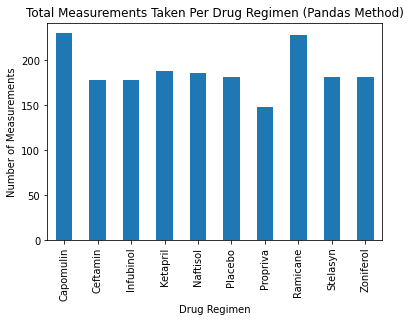

In [85]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#Sort the dataset by drug regimen and count by mouse ID to calculate how many measurements were taken 
count_of_measurements = cleaned_merged_study.groupby(["Drug Regimen"]).count()["Mouse ID"]

#Create the bar plot using pandas
count_of_measurements.plot(kind="bar")

# Set a title and label axis for the bar plot
plt.title("Total Measurements Taken Per Drug Regimen (Pandas Method)")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")
plt.show()

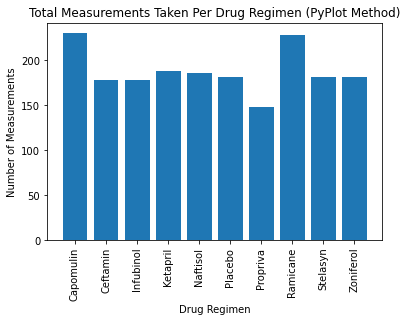

In [86]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#Set x-axis to the number of drugs being measured
x_axis = np.arange(len(count_of_measurements))
tick_locations = [value for value in x_axis]

#Set y-axis to the number of measurements for each drug (calculated previously by count of measurements)
y_axis = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

#Create the bar plot using pyplot and set tick locations
plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")

#Set a title and label axis for the bar plot
plt.title("Total Measurements Taken Per Drug Regimen (PyPlot Method)")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")
plt.show()


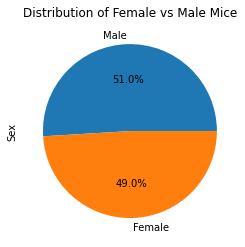

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Retrieve the "sex" column and count the number of mice per gender
count_of_sex = cleaned_merged_study["Sex"].value_counts()

#Create the pie plot and label the axis
count_of_sex.plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribution of Female vs Male Mice")
plt.show()

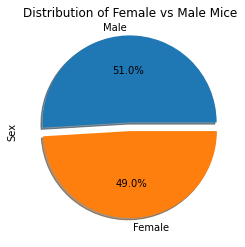

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Set the labels and variables for the chart
labels = count_of_sex.index
sizes = count_of_sex.values
explode = [0.1, 0]

#Create the pie chart and label the axis
plt.pie(sizes, explode=explode, labels=labels,
        autopct="%1.1f%%", shadow=True)
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [89]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = cleaned_merged_study.groupby(["Mouse ID"])["Timepoint"].max()

#Reset the index of greatest timepoint df
greatest_timepoint = greatest_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_study_greatest_timepoint = pd.merge(greatest_timepoint, cleaned_merged_study, on=("Mouse ID", "Timepoint"), how="left")
merged_study_greatest_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [90]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = merged_study_greatest_timepoint.loc[merged_study_greatest_timepoint["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    volume_list.append(final_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #Create a variables for outlier to determine if we have any
    outlier = final_volume.loc[(final_volume < lower_bound) | (final_volume > upper_bound)]
    print (f"{treatment} outlier is {outlier}")

Capomulin outlier is Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outlier is Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outlier is 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outlier is Series([], Name: Tumor Volume (mm3), dtype: float64)


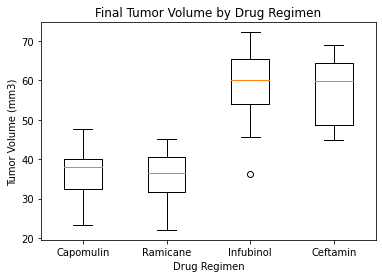

In [106]:
# Generate a box plot of the final tumor volume of each mouse across the four regimens of interest
plt.boxplot(volume_list, labels=treatment_regimens)
plt.title('Final Tumor Volume by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [92]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#We will use the data for Mouse ID "b128" for the line plot
b128_capomulin_data = cleaned_merged_study.loc[cleaned_merged_study["Mouse ID"] == "b128"]
b128_capomulin_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
468,b128,5,45.651331,0,Capomulin,Female,9,22
674,b128,10,43.270852,0,Capomulin,Female,9,22
713,b128,15,43.784893,0,Capomulin,Female,9,22
925,b128,20,42.731552,0,Capomulin,Female,9,22
1257,b128,25,43.262145,1,Capomulin,Female,9,22
1388,b128,30,40.605335,1,Capomulin,Female,9,22
1535,b128,35,37.967644,1,Capomulin,Female,9,22
1616,b128,40,38.379726,2,Capomulin,Female,9,22
1751,b128,45,38.982878,2,Capomulin,Female,9,22


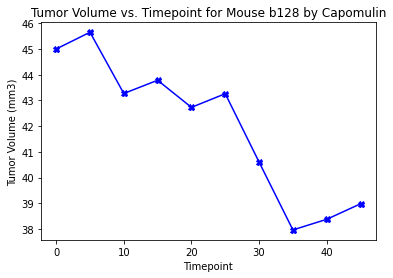

In [107]:
#Create the line plot 
b128_timepoint_xaxis = b128_capomulin_data["Timepoint"]
b128_volume_yaxis = b128_capomulin_data["Tumor Volume (mm3)"]
plt.plot(b128_timepoint_xaxis, b128_volume_yaxis, marker ='X', color='blue',)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Timepoint for Mouse b128 by Capomulin")
plt.show()

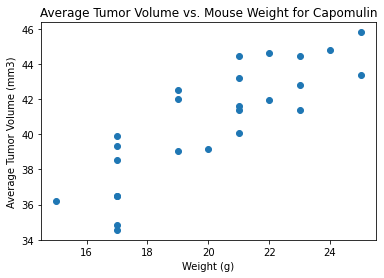

In [94]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Sort the list to group by the drug regimen Capomulin
capomulin_weight_volume = cleaned_merged_study.loc[cleaned_merged_study["Drug Regimen"] == "Capomulin"]

#Calculate the average tumor volume and group by Mouse ID
average_tumor_volume = capomulin_weight_volume.groupby(["Mouse ID"]).mean()

#Create the scatter plot
plt.scatter(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717


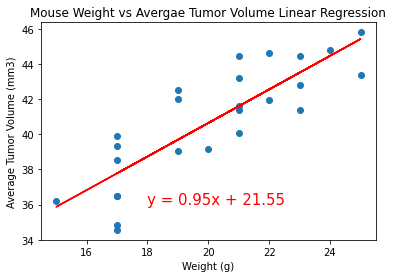

In [100]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = average_tumor_volume["Weight (g)"]
y_values = average_tumor_volume["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Mouse Weight vs Avergae Tumor Volume Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()